#### **Model Training**

#### **Import Data and Required Packages**

In this section, we will import the necessary libraries and packages required for our data analysis and modeling process. Properly importing libraries is crucial for ensuring our analysis runs smoothly and efficiently.

#### **Basic Imports**

First, we need to import the fundamental libraries for data manipulation, visualization, and modeling. Below are the essential libraries we will use:


In [1]:
# Importing Logistic Regression model from sklearn for binary and multiclass classification tasks
from sklearn.linear_model import LogisticRegression  # type: ignore

# Importing Decision Tree Classifier from sklearn, a versatile model used for classification and regression tasks
from sklearn.tree import DecisionTreeClassifier  # type: ignore

# Importing ensemble models: 
# Random Forest for robust classification/regression using multiple decision trees 
# AdaBoost for boosting weak classifiers to improve model accuracy
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier  # type: ignore

# Importing K-Neighbors Classifier from sklearn, a simple yet effective algorithm for classification based on proximity to training examples
from sklearn.neighbors import KNeighborsClassifier  # type: ignore

# Importing XGBClassifier from the XGBoost library, an optimized gradient boosting algorithm widely used in competitions for its high performance
from xgboost import XGBClassifier  # type: ignore

# Importing CatBoostClassifier from the CatBoost library, a gradient boosting algorithm that handles categorical features naturally and effectively
from catboost import CatBoostClassifier  # type: ignore 

# Importing metrics for evaluating model performance:
# accuracy_score for overall accuracy
# precision_score for precision of positive predictions
# recall_score for sensitivity (true positive rate)
# f1_score for the balance between precision and recall
# confusion_matrix for visualizing model prediction performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # type: ignore #

# Importing pandas for data manipulation and analysis, especially for handling structured data (like DataFrames)
import pandas as pd # type: ignore

# Importing Matplotlib for creating static, interactive, and animated visualizations in Python
import matplotlib.pyplot as plt  # type: ignore

# Importing Seaborn for making statistical graphics based on Matplotlib, with a high-level interface for drawing attractive plots
import seaborn as sns  # type: ignore

#### **Importing the CSV Data as a Pandas DataFrame**
In this section, we will import our dataset from a CSV file into a Pandas DataFrame. This allows us to manipulate and analyze the data easily.

In [2]:
# We're using a tool called "pandas" that helps us organize and work with data more easily.
import pandas as pd  # type: ignore

# Here, we're opening a file called 'loan_approval_dataset.csv' from a folder named 'data.'
# This file probably contains information related to loan approvals.
df = pd.read_csv('data/loan_approval_dataset.csv')  # Note: We use forward slashes for better compatibility on different systems.

# Now, we'll take a quick look at the first five rows of the data to understand what it looks like.
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


#### **Basic Data Inspection**

In [3]:
# Display the first few rows of the DataFrame to get a sense of its structure
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.tail()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


#### **Check for missing values in the DataFrame**

In [5]:
# Check for missing values in the DataFrame
df.describe()


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


#### **Check for missing values in the DataFrame**

In [6]:
# Check for missing values in the DataFrame
df.isnull().sum()


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

#### **Check missing value  Heatmap for  data**

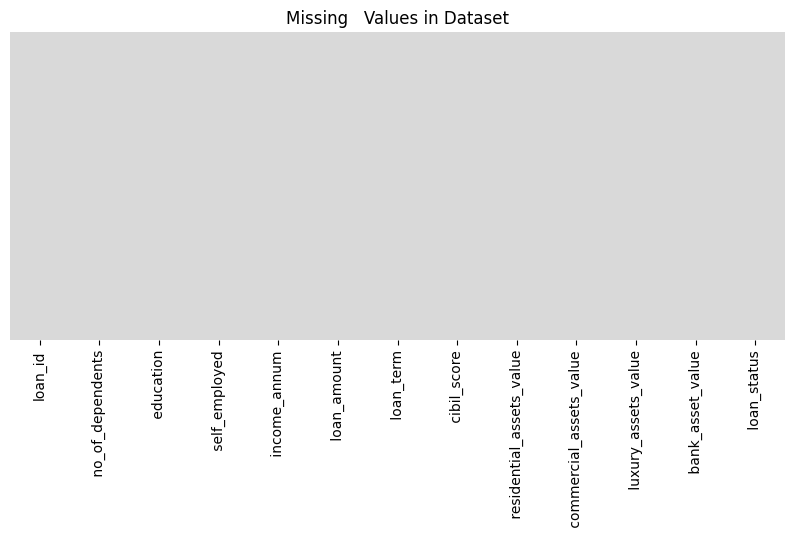

In [7]:
# Heatmap for missing data
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='tab20c_r')
plt.title('Missing   Values in Dataset')
plt.show()

#### **Check for dimensions shape for  data**

In [8]:
df.shape

(4269, 13)

#### **Check for Duplicated Values**

In [9]:
df.duplicated().sum()

0

#### **Check for Dtypes**

In [10]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

#### **Check for information data**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


#### **Check for unique values of each column data**

In [12]:
df.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

#### **Check for numerical & categorical columns**

In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['loan_id', ' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']

We have 3 categorical features : [' education', ' self_employed', ' loan_status']


#### **Check for categorical columns Unique Value**

In [14]:
print("Unique Value in Categorical Columns :")

# Loop through each specified column to print its unique values
for column in [' education', ' self_employed', ' loan_status']:
    # Print the unique categories found in the current colum
    print(f"Categories in column '{column}': {df[column].unique()}")

Unique Value in Categorical Columns :
Categories in column ' education': [' Graduate' ' Not Graduate']
Categories in column ' self_employed': [' No' ' Yes']
Categories in column ' loan_status': [' Approved' ' Rejected']


#### **Check for unique values of each column data**

In [15]:
df.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

#### **Check for Removed the white space from  Columns of  Data**

In [16]:

df.columns = df.columns.str.strip()

In [17]:

categorical_cols = df.select_dtypes(include='object').columns

# Remove leading and trailing whitespace from categorical columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.str.strip())

# Remove all spaces from categorical values
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.str.replace(' ', '', regex=False))

# Display the DataFrame after cleaning
print("\nAfter cleaning:")

print("Unique Value in Categorical Columns :")

# Loop through each specified column to print its unique values
for column in ['education', 'self_employed', 'loan_status']:
    # Print the unique categories found in the current colum
    print(f"Categories in column '{column}': {df[column].unique()}")



After cleaning:
Unique Value in Categorical Columns :
Categories in column 'education': ['Graduate' 'NotGraduate']
Categories in column 'self_employed': ['No' 'Yes']
Categories in column 'loan_status': ['Approved' 'Rejected']


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


##### **Label Encoding the 'loan_status' Target Column for Machine Learning Classification Model Training**

To prepare our data for training a classification model, we will use `LabelEncoder` from `sklearn.preprocessing` to convert the categorical values in the `loan_status` column into numeric labels.

**Steps:**
- **Step 1:** Import the `LabelEncoder` from the `sklearn.preprocessing` module.
- **Step 2:** Initialize an instance of the `LabelEncoder`.
- **Step 3:** Apply the `fit_transform` method to encode the `loan_status` column in our DataFrame.

The code to implement these steps is shown below:


In [19]:
from sklearn.preprocessing import LabelEncoder # type: ignore

# Sample categorical labels

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Animal' column
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])


In [20]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,NotGraduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,NotGraduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


 #### **Remove unnecessary columns from data**

In [21]:
# Remove unnecessary columns permanently
df.drop(columns=['loan_id'], inplace=True)

In [22]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,NotGraduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,NotGraduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,0,NotGraduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,2,NotGraduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,1,NotGraduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,0




#### **DataFrame saved as `data_preprocessing.csv` in the specified folder.**



In [23]:
# Define the folder path where you want to save the file
# Change 'your_folder' to your desired folder path
folder_path = 'data/data_preprocessing.csv'  # Relative path
# or use an absolute path
# folder_path = '/path/to/your/folder/data_preprocessing.csv'  # Absolute path

# Save the DataFrame to a CSV file
df.to_csv(folder_path, index=False)  # index=False prevents writing row indices

print("DataFrame saved as data_preprocessing.csv in the specified folder.")

DataFrame saved as data_preprocessing.csv in the specified folder.


#### **Data Preparation for Machine Learning Model Training**

Data preparation is a crucial step in the machine learning workflow. Properly prepared data improves model performance and ensures that the model can learn effectively from the provided data. Below are the key steps involved in preparing the data for model training.

#### **Target Variable Splitting**
We will spilt the Full dataset into **Input** and **target** variables

Input is also called **Feature Variables**
Output referes to Target **variables**

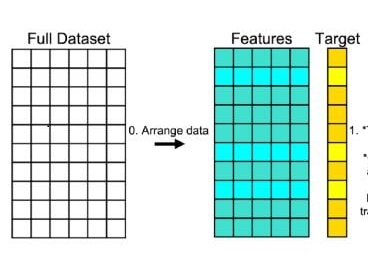

In [54]:
# Printing unique categories in the 'Sex' (gender) column
print("Categories in 'self_employed' variable:     ", end=" ")
print(df['self_employed'].unique())  # df['Sex'].unique() retrieves unique values from the 'Sex' column

# Printing unique categories in the 'ChestPainType' column
print("Categories in 'education' variable:  ", end=" ")
print(df['education'].unique())  # Retrieves unique chest pain types from the 'ChestPainType' column



Categories in 'self_employed' variable:      ['No' 'Yes']
Categories in 'education' variable:   ['Graduate' 'NotGraduate']


In [59]:
# Retrieves unique chest pain types from the 'ChestPainType' column
df['self_employed'] = df['self_employed'].astype('category')  # Converting 'Sex' to categorical type
df['education'] = df['education'].astype('category')  # Converting 'ChestPainType' to categorical type

# Selecting and displaying the names of columns with 'category' data type
category_columns = df.select_dtypes(['category']).columns
print("Categorical columns:", category_columns)  # Optional: Print the categorical columns for verification

# Convert categorical variables into dummy variables (one-hot encoding)
# drop_first=True prevents the dummy variable trap by dropping the first category
education_dummies = pd.get_dummies(df['education'], drop_first=True)  # Create dummy variables for 'Sex'
self_employed_dummies = pd.get_dummies(df['self_employed'], drop_first=True)  # Dummy variables for 'ChestPainType'
# Add the newly created dummy variables to the original DataFrame
df = pd.concat([df,self_employed_dummies,education_dummies ], axis=1)

# Drop the original categorical columns since they've been encoded into dummy variables
df.drop(['self_employed','education'], axis=1, inplace=True)

# View the first few rows of the updated DataFrame to confirm changes
print(df.head(5))  # Display the first 5 rows of the updated DataFrame

Categorical columns: Index(['education', 'self_employed'], dtype='object')
   no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0                 2       9600000     29900000         12          778   
1                 0       4100000     12200000          8          417   
2                 3       9100000     29700000         20          506   
3                 3       8200000     30700000          8          467   
4                 5       9800000     24200000         20          382   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                   2400000                 17600000             22700000   
1                   2700000                  2200000              8800000   
2                   7100000                  4500000             33300000   
3                  18200000                  3300000             23300000   
4                  12400000                  8200000             29400000   

   bank_asset_val

In [60]:
df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Yes,NotGraduate
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,False,False
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,True,True
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,False,False
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,False,False
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,True,True


In [61]:
# Convert all boolean columns to integers (0s and 1s)
for col in df.select_dtypes(include=[bool]).columns:
    df[col] = df[col].astype(int)

# Check the DataFrame to see the changes
print(df.head())

   no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0                 2       9600000     29900000         12          778   
1                 0       4100000     12200000          8          417   
2                 3       9100000     29700000         20          506   
3                 3       8200000     30700000          8          467   
4                 5       9800000     24200000         20          382   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                   2400000                 17600000             22700000   
1                   2700000                  2200000              8800000   
2                   7100000                  4500000             33300000   
3                  18200000                  3300000             23300000   
4                  12400000                  8200000             29400000   

   bank_asset_value  loan_status  Yes  NotGraduate  
0           8000000            0    0  

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   income_annum              4269 non-null   int64
 2   loan_amount               4269 non-null   int64
 3   loan_term                 4269 non-null   int64
 4   cibil_score               4269 non-null   int64
 5   residential_assets_value  4269 non-null   int64
 6   commercial_assets_value   4269 non-null   int64
 7   luxury_assets_value       4269 non-null   int64
 8   bank_asset_value          4269 non-null   int64
 9   loan_status               4269 non-null   int32
 10  Yes                       4269 non-null   int32
 11  NotGraduate               4269 non-null   int32
dtypes: int32(3), int64(9)
memory usage: 350.3 KB


In [67]:
# Renaming multiple columns in x_train
df = df.rename(columns={
    'Yes': 'self_employed',
    'NotGraduate': 'education',
    # Add more columns as needed
})


In [65]:
df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,self_employed,NotGraduate
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   income_annum              4269 non-null   int64
 2   loan_amount               4269 non-null   int64
 3   loan_term                 4269 non-null   int64
 4   cibil_score               4269 non-null   int64
 5   residential_assets_value  4269 non-null   int64
 6   commercial_assets_value   4269 non-null   int64
 7   luxury_assets_value       4269 non-null   int64
 8   bank_asset_value          4269 non-null   int64
 9   loan_status               4269 non-null   int32
 10  self_employed             4269 non-null   int32
 11  education                 4269 non-null   int32
dtypes: int32(3), int64(9)
memory usage: 350.3 KB


In [69]:
# Split data to be used in the models
# Create matrix of features
x = df.drop('loan_status', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = df['loan_status'] # y is the column we're trying to predict

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

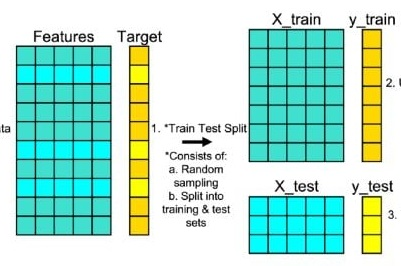

In [72]:
X_train.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,self_employed,education
1675,5,7900000,29900000,6,568,5800000,13900000,15900000,8700000,0,1
1164,0,9600000,34000000,12,710,23800000,10300000,38100000,7800000,1,1
192,1,800000,2900000,8,682,2200000,1100000,2900000,700000,0,0
910,2,4900000,13100000,18,754,8200000,3300000,16500000,7200000,1,0
567,5,3000000,11100000,12,441,8500000,2500000,7300000,2000000,1,0


In [73]:
X_test.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,self_employed,education
1703,5,5400000,19700000,20,423,6500000,10000000,15700000,7300000,0,0
1173,2,5900000,14000000,8,599,4700000,9500000,17800000,6700000,0,0
308,3,9600000,19900000,14,452,4200000,16200000,28500000,6600000,0,0
1322,2,6200000,23400000,8,605,10000000,10800000,21800000,9200000,0,0
3271,3,5800000,14100000,12,738,11700000,4400000,15400000,8400000,1,1


In [74]:
print("Shape of x_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("---"*10)
print("Shape of x_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (3415, 11)
Shape of y_train:  (3415,)
------------------------------
Shape of x_test:  (854, 11)
Shape of y_test:  (854,)


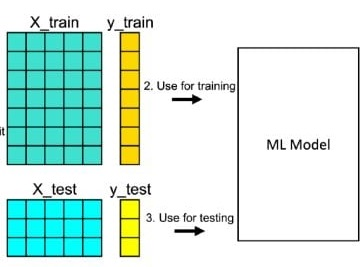

#### **Define Models and  Evaluate metric  Function  model Training**

In [76]:
# Dictionary of models to be evaluated
models = {
    "Logistic Regression": LogisticRegression(),  # Logistic Regression model
    "K-Neighbors Classifier": KNeighborsClassifier(),  # K-Nearest Neighbors model
    "Decision Tree Classifier": DecisionTreeClassifier(),  # Decision Tree model
    "Random Forest Classifier": RandomForestClassifier(),  # Random Forest model
    "XGBClassifier": XGBClassifier(),  # XGBoost model
    "CatBoost Classifier": CatBoostClassifier(verbose=False),  # CatBoost model with verbosity off
    "AdaBoost Classifier": AdaBoostClassifier()  # AdaBoost model
}

# Function to evaluate model performance based on various metrics
def evaluate_model(y_true, y_pred):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)  # Calculate accuracy
    precision = precision_score(y_true, y_pred, average='weighted')  # Calculate precision
    recall = recall_score(y_true, y_pred, average='weighted')  # Calculate recall
    f1 = f1_score(y_true, y_pred, average='weighted')  # Calculate F1 Score
    
    return accuracy, precision, recall, f1  # Return the calculated metrics

# Lists to store model names and their test accuracies
model_list = []  # To store names of models
accuracy_list = []  # To store test accuracies of models

# Loop through each model, train it, and evaluate its performance
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model on the training data
    
    # Make predictions on both training and testing sets
    y_train_pred = model.predict(X_train)  # Predictions on training set
    y_test_pred = model.predict(X_test)  # Predictions on testing set
    
    # Evaluate performance on the training set
    train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_train_pred)
    
    # Evaluate performance on the test set
    test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_test_pred)

    # Store the model name and its test accuracy
    model_list.append(model_name)  # Append model name to the list
    accuracy_list.append(test_accuracy)  # Append test accuracy to the list

    # Print model evaluation results
    print(f"{model_name} Performance:")
    
    print("Training Set Performance:")
    print(f"- Accuracy: {train_accuracy:.4f}")  # Print training accuracy
    print(f"- Precision: {train_precision:.4f}")  # Print training precision
    print(f"- Recall: {train_recall:.4f}")  # Print training recall
    print(f"- F1-Score: {train_f1:.4f}")  # Print training F1 score
    
    print("Test Set Performance:")
    print(f"- Accuracy: {test_accuracy:.4f}")  # Print test accuracy
    print(f"- Precision: {test_precision:.4f}")  # Print test precision
    print(f"- Recall: {test_recall:.4f}")  # Print test recall
    print(f"- F1-Score: {test_f1:.4f}")  # Print test F1 score
    
    print("=" * 100)  # Print separator line for better readability

# Summary of test accuracies
print("Summary of Test Accuracies:")
for model_name, accuracy in zip(model_list, accuracy_list):
    print(f"{model_name}: Accuracy = {accuracy:.4f}")  # Print each model's name and accuracy

c:\Users\SURESH BEEKHANI\Desktop\Loan Eligibility Prediction\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Performance:
Training Set Performance:
- Accuracy: 0.7318
- Precision: 0.7466
- Recall: 0.7318
- F1-Score: 0.7045
Test Set Performance:
- Accuracy: 0.7295
- Precision: 0.7467
- Recall: 0.7295
- F1-Score: 0.6978
K-Neighbors Classifier Performance:
Training Set Performance:
- Accuracy: 0.7206
- Precision: 0.7147
- Recall: 0.7206
- F1-Score: 0.7107
Test Set Performance:
- Accuracy: 0.5785
- Precision: 0.5539
- Recall: 0.5785
- F1-Score: 0.5600
Decision Tree Classifier Performance:
Training Set Performance:
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1-Score: 1.0000
Test Set Performance:
- Accuracy: 0.9754
- Precision: 0.9754
- Recall: 0.9754
- F1-Score: 0.9754
Random Forest Classifier Performance:
Training Set Performance:
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1-Score: 1.0000
Test Set Performance:
- Accuracy: 0.9778
- Precision: 0.9778
- Recall: 0.9778
- F1-Score: 0.9777
XGBClassifier Performance:
Training Set Performance:
- Accuracy

c:\Users\SURESH BEEKHANI\Desktop\Loan Eligibility Prediction\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier Performance:
Training Set Performance:
- Accuracy: 0.9777
- Precision: 0.9777
- Recall: 0.9777
- F1-Score: 0.9777
Test Set Performance:
- Accuracy: 0.9672
- Precision: 0.9672
- Recall: 0.9672
- F1-Score: 0.9672
Summary of Test Accuracies:
Logistic Regression: Accuracy = 0.7295
K-Neighbors Classifier: Accuracy = 0.5785
Decision Tree Classifier: Accuracy = 0.9754
Random Forest Classifier: Accuracy = 0.9778
XGBClassifier: Accuracy = 0.9824
CatBoost Classifier: Accuracy = 0.9766
AdaBoost Classifier: Accuracy = 0.9672


In [78]:
import pandas as pd  # type: ignore
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy'])

,Model Name,Accuracy
0,Logistic Regression,0.729508
1,K-Neighbors Classifier,0.578454
2,Decision Tree Classifier,0.975410
3,Random Forest Classifier,0.977752
4,XGBClassifier,0.982436
5,CatBoost Classifier,0.976581
6,AdaBoost Classifier,0.967213


In [79]:
# Initialize the Random Forest Classifier
# Note: The parameter 'fit_intercept' does not exist for RandomForestClassifier,
# so it should be removed. 
lin_model = XGBClassifier()  # Create a RandomForestClassifier instance

# Fit the model to the training data
lin_model.fit(X_train, y_train)  # Train the model on the training set

# Make predictions on the test set
y_pred = lin_model.predict(X_test)  # Predict the labels for the test set

# Calculate the precision score of the model
# Precision is calculated as the ratio of correctly predicted positive observations
precision = precision_score(y_test, y_pred) * 100  # Calculate precision and convert to percentage

# Print the precision score
print("Precision of the model is %.2f%%" % precision)  # Print precision as a percentage

Precision of the model is 98.10%


In [80]:
# Predict
y_pred= lin_model.predict(X_test)
print(y_pred)
print(y_pred.shape)

[1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0
 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0
 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0
 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0
 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1
 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 

In [81]:
probabilities = lin_model.predict_proba(X_test)[:, 1]
print(probabilities.shape)
print(probabilities)

(854,)
[9.99847531e-01 8.78508945e-05 9.99986768e-01 6.89703302e-05
 4.69803344e-05 2.59024353e-04 1.73135064e-04 9.99928713e-01
 2.39072702e-04 9.99924541e-01 9.99759853e-01 6.00499370e-05
 3.99852543e-05 9.99953032e-01 9.99986649e-01 1.14768518e-05
 2.50179037e-05 6.91963360e-03 2.23172173e-01 9.99966264e-01
 2.93386638e-05 9.98348951e-01 9.99924779e-01 9.99981642e-01
 4.10188586e-05 9.36270808e-05 3.56905439e-05 1.12718459e-04
 5.25786636e-05 9.99824941e-01 3.08853516e-04 9.99323130e-01
 9.99082446e-01 3.11351832e-05 9.99885678e-01 9.99953151e-01
 1.20897539e-05 7.94306048e-04 2.53800914e-04 9.99941349e-01
 9.98347878e-01 1.96960047e-01 9.86310624e-05 3.56833261e-05
 6.23406172e-01 1.82269083e-04 6.13115320e-04 1.50809952e-04
 2.39958263e-05 9.99948025e-01 6.25355824e-05 4.01721448e-01
 9.99893308e-01 2.94151163e-04 7.28238523e-02 7.10124950e-05
 9.92209243e-05 2.86945233e-05 7.21499681e-01 2.66001676e-04
 8.79179745e-04 9.85160077e-05 9.99956727e-01 9.99966502e-01
 9.99980807e-01 5

In [82]:
for i in range(len(y_test)):
  print(round(probabilities[i], 3)," --> ", y_pred[i])

1.0  -->  1
0.0  -->  0
1.0  -->  1
0.0  -->  0
0.0  -->  0
0.0  -->  0
0.0  -->  0
1.0  -->  1
0.0  -->  0
1.0  -->  1
1.0  -->  1
0.0  -->  0
0.0  -->  0
1.0  -->  1
1.0  -->  1
0.0  -->  0
0.0  -->  0
0.007  -->  0
0.223  -->  0
1.0  -->  1
0.0  -->  0
0.998  -->  1
1.0  -->  1
1.0  -->  1
0.0  -->  0
0.0  -->  0
0.0  -->  0
0.0  -->  0
0.0  -->  0
1.0  -->  1
0.0  -->  0
0.999  -->  1
0.999  -->  1
0.0  -->  0
1.0  -->  1
1.0  -->  1
0.0  -->  0
0.001  -->  0
0.0  -->  0
1.0  -->  1
0.998  -->  1
0.197  -->  0
0.0  -->  0
0.0  -->  0
0.623  -->  1
0.0  -->  0
0.001  -->  0
0.0  -->  0
0.0  -->  0
1.0  -->  1
0.0  -->  0
0.402  -->  0
1.0  -->  1
0.0  -->  0
0.073  -->  0
0.0  -->  0
0.0  -->  0
0.0  -->  0
0.721  -->  1
0.0  -->  0
0.001  -->  0
0.0  -->  0
1.0  -->  1
1.0  -->  1
1.0  -->  1
0.0  -->  0
0.0  -->  0
0.0  -->  0
0.002  -->  0
0.0  -->  0
0.0  -->  0
0.001  -->  0
0.022  -->  0
0.0  -->  0
1.0  -->  1
0.0  -->  0
1.0  -->  1
0.014  -->  0
0.0  -->  0
0.001  -->  0
1.

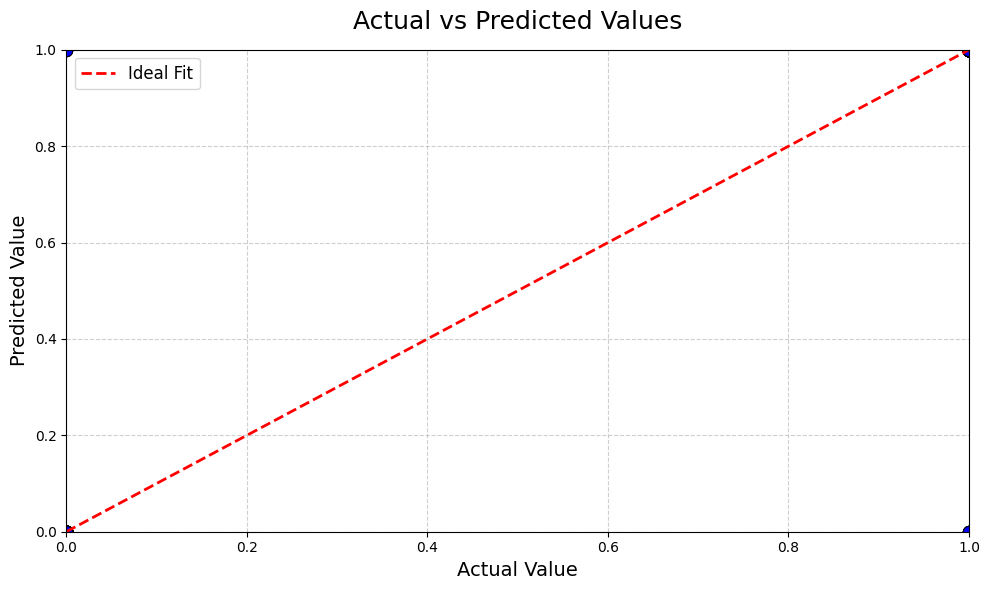

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis for subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='blue', s=80, edgecolor='black', alpha=0.7)

# Plot the identity line (ideal prediction line)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Fit')

# Set axis limits to match the data range
ax.set_xlim([min(y_test), max(y_test)])
ax.set_ylim([min(y_test), max(y_test)])

# Add title and labels with better font sizes
ax.set_title('Actual vs Predicted Values', fontsize=18, pad=15)
ax.set_xlabel('Actual Value', fontsize=14)
ax.set_ylabel('Predicted Value', fontsize=14)

# Add gridlines for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Add a legend
ax.legend(fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
